In [2]:
import pandas as pd
import numpy as np
import time
from sklearn.feature_extraction import DictVectorizer
from efficient_apriori import apriori

In [3]:
# read files without head and scan lines by lines
df = pd.read_csv('Market_Basket_Optimisation.csv', header = None, sep = '|')

# data set
temp_set = set()
# list
transactions = []

# delete nan value 
# items = [str(i) for i in items if str(i) != "nan"]

# get index
for i in df.index:
    temp_set = set()
    
    # split whole string to array list line by line
    for k in df.loc[i].str.split(',').values:
        # get the list from k and add it to set
        for j in range(len(k)):
            temp_set.add(k[j])
    
    # append data set to list
    transactions.append(temp_set)   


In [4]:
now = time.time()
itemsets, rules = apriori(transactions, min_support=0.01,  min_confidence=0.5)
print('running time:', time.time() - now)
print('results:', rules)

running time: 1.6402440071105957
results: [{eggs, ground beef} -> {mineral water}, {ground beef, milk} -> {mineral water}]


## Word Cloud

In [24]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
from PIL import Image
# natural language tool kit
from nltk.tokenize import word_tokenize
import matplotlib.image as mpimg


In [35]:

# read files without head and scan lines by lines
test = "wahf sfasdfsj sadfsadfd asfsad "
nltk_tokens = word_tokenize(test)
print(nltk_tokens)

text =""
for i in transactions:
    for j in i:
        text += ","
        text += j
bg_pic = mpimg.imread('heart.jpg')

['wahf', 'sfasdfsj', 'sadfsadfd', 'asfsad']


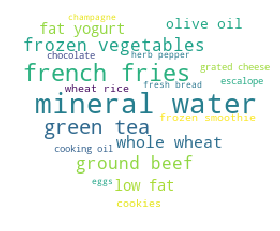

In [32]:

wc = WordCloud(mask = bg_pic, background_color = "white", width = 1500, height = 1000, max_words = 20)
image_colors = ImageColorGenerator(bg_pic)
wordcloud = wc.generate(text)
wordcloud.to_file("lol.jpg")
plt.imshow(wordcloud)
# 关闭坐标
plt.axis("off")
plt.show()